# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

2024-11-24 23:35:43.297006: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


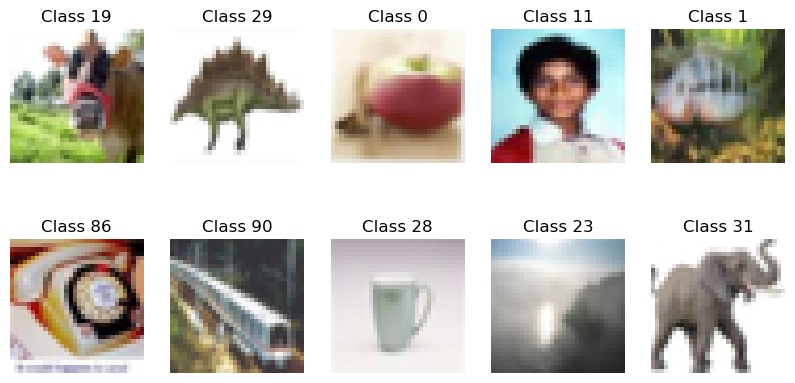

In [2]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# Define a function to display images
def plot_sample_images(images, labels, class_names, num_samples=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.show()

# Load class names
class_names = [f"Class {i}" for i in range(100)]  # Replace with actual names if available

# Plot sample images
plot_sample_images(x_train, y_train, class_names)


In [3]:
# Check the shape of the images and labels
print(f"Shape of a single image: {x_train[0].shape}")
print(f"Number of training images: {x_train.shape[0]}")
print(f"Number of test images: {x_test.shape[0]}")

# Check the number of unique classes
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

Shape of a single image: (32, 32, 3)
Number of training images: 50000
Number of test images: 10000
Number of classes: 100


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
# Your code here
#Normalize the Images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# One-Hot Encode the Labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=100)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=100)
# Split Training Set into Training and Validation Sets
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print(f"Training set shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation set shape: {x_val.shape}, Validation labels shape: {y_val.shape}")
print(f"Test set shape: {x_test.shape}, Test labels shape: {y_test.shape}")


Training set shape: (40000, 32, 32, 3), Training labels shape: (40000, 100)
Validation set shape: (10000, 32, 32, 3), Validation labels shape: (10000, 100)
Test set shape: (10000, 32, 32, 3), Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here

# Define the model architecture
def create_limited_cnn(input_shape=(32, 32, 3), num_classes=100):
    model = Sequential()
    
    # First convolutional block
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Second convolutional block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Third convolutional block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flatten and Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))  # Fully connected layer
    model.add(Dense(num_classes, activation='softmax'))  # Output layer
    
    return model

# Instantiate the model
limited_model = create_limited_cnn()

# Print the model summary
limited_model.summary()

/opt/anaconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [9]:
from keras import optimizers

# Your code here
# Define a custom Adam optimizer with a specific learning rate
custom_adam = optimizers.Adam(learning_rate=0.001)

# Compile the model with the custom optimizer
limited_model.compile(
    optimizer=custom_adam,  # Custom Adam optimizer
    loss='categorical_crossentropy',  # Loss function
    metrics=['accuracy']  # Metric to track
)

print("Model compiled successfully with a custom optimizer!")

Model compiled successfully with a custom optimizer!


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [10]:
# Your code here
# Train the model
history = limited_model.fit(
    x_train, 
    y_train, 
    validation_data=(x_val, y_val),  # Use validation set for validation
    epochs=20,  # Number of epochs
    batch_size=32,  # Batch size
    verbose=1  # Print progress during training
)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 44ms/step - accuracy: 0.0664 - loss: 4.1620 - val_accuracy: 0.2046 - val_loss: 3.2719
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 51ms/step - accuracy: 0.2415 - loss: 3.0918 - val_accuracy: 0.2699 - val_loss: 2.9584
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.3318 - loss: 2.6303 - val_accuracy: 0.3359 - val_loss: 2.6146
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.3944 - loss: 2.3360 - val_accuracy: 0.3547 - val_loss: 2.5401
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.4562 - loss: 2.0628 - val_accuracy: 0.3650 - val_loss: 2.5369
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.5002 - loss: 1.8491 - val_accuracy: 0.3851 - val_loss: 2.5202
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.5457 - loss: 1.6563 - val_accuracy: 0.3759 - val_loss: 2.5937
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.5943 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [12]:
# Your code here
# Evaluate the model on the test set
test_loss, test_accuracy = limited_model.evaluate(x_test, y_test, verbose=1)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3536 - loss: 5.7556
Test Accuracy: 0.3478
Test Loss: 5.7698


In [13]:
#use of Top-K Categorical Accuracy
#this metric checks whether the true class is within the top K predictions. Top-K accuracy is a useful metric to understand how well the model identifies a class among the most likely candidates.
# Top-5 Categorical Accuracy
top_k_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=5)
top_k_acc.update_state(y_test, limited_model.predict(x_test))
top_5_accuracy = top_k_acc.result().numpy()

print(f"Top-5 Accuracy: {top_5_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Top-5 Accuracy: 0.6345


A Top-5 accuracy of 0.6345 means that for approximately 63 out of 100 test samples, the true label is within the top 5 predictions made by your model.
In a classification task with 100 classes (like CIFAR-100), this shows that the model is moderately good at narrowing down the correct class to the top 5 most likely ones.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

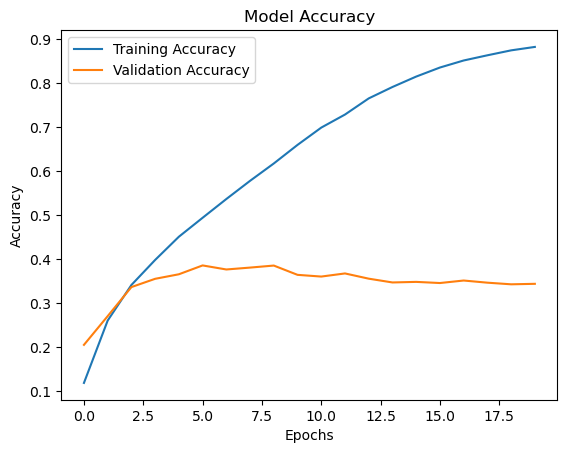

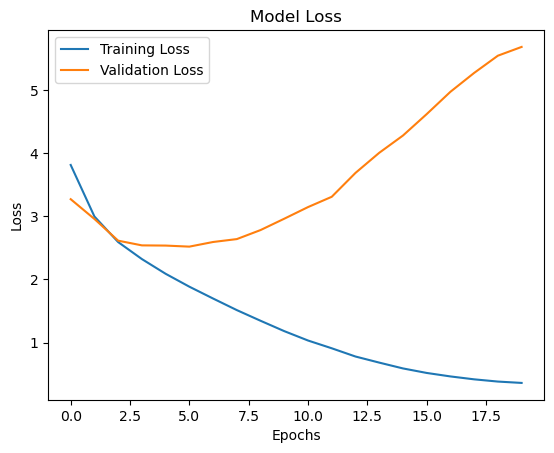

In [14]:
# Your code here
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


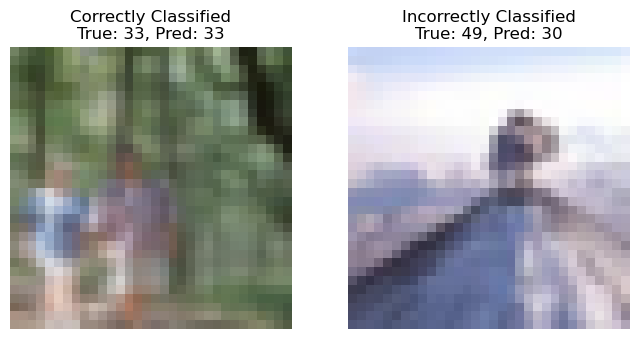

In [22]:
# Predict classes
y_pred = limited_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Indices for correct and incorrect classifications
correct_idx = np.where(y_pred_classes == y_true_classes)[0][0]
incorrect_idx = np.where(y_pred_classes != y_true_classes)[0][0]
# Plot the images
plt.figure(figsize=(8, 4))

# Correctly classified image
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified\nTrue: {y_true_classes[correct_idx]}, Pred: {y_pred_classes[correct_idx]}")
plt.axis('off')

# Incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified\nTrue: {y_true_classes[incorrect_idx]}, Pred: {y_pred_classes[incorrect_idx]}")
plt.axis('off')

plt.show()


In [23]:
# Correct classification probabilities
print(f"Classification probabilities for correctly classified image:\n{y_pred[correct_idx]}")

# Incorrect classification probabilities
print(f"\nClassification probabilities for incorrectly classified image:\n{y_pred[incorrect_idx]}")

Classification probabilities for correctly classified image:
[4.1711404e-12 1.3065912e-07 1.2567071e-10 1.0767177e-07 1.0720362e-09
 1.4169411e-12 1.6563344e-09 1.7305904e-09 1.0179470e-07 3.1241651e-08
 2.9585631e-10 3.1453160e-10 1.4929668e-05 9.2477768e-09 1.1520025e-08
 3.9185068e-08 1.2729740e-07 9.9070724e-11 8.5576432e-04 5.2612528e-08
 2.7540078e-15 1.3138520e-09 1.0134166e-09 5.2517057e-09 2.4735277e-18
 2.4156293e-07 7.0889909e-12 1.6652152e-07 4.7301312e-11 1.1550147e-04
 1.3578199e-09 3.3977189e-11 1.2071462e-07 9.8934889e-01 1.8898842e-05
 3.5805346e-08 2.8119229e-11 1.7164640e-06 1.1843121e-08 6.0199325e-11
 2.2908184e-10 3.1559180e-09 1.2093419e-04 1.3546633e-10 1.7947325e-07
 8.3391427e-10 1.0865598e-12 1.6275552e-08 5.3578714e-07 2.2713593e-12
 4.2732587e-08 1.1240357e-06 3.0120023e-12 1.3126164e-14 3.9171709e-07
 2.6537356e-05 2.6244019e-11 9.4652080e-08 6.3247844e-12 9.4330508e-09
 1.0812574e-15 1.1191177e-08 1.5948627e-10 1.3490384e-08 1.4917598e-09
 6.8593931e-07 1

The training accuracy improves steadily over epochs, indicating that the model is learning patterns from the training data. However, the validation accuracy plateaus, suggesting the model may struggle to generalize to unseen data, a common indication of overfitting. The loss plots corroborate this, showing that while the training loss decreases significantly, the validation loss stops improving, reinforcing the potential overfitting issue. These trends suggest that while the model is capable of effectively minimizing errors on the training set, additional measures like regularization or data augmentation may be required to improve its generalization to the validation set.

For the correctly classified image, the model demonstrates strong confidence, assigning a probability of over 98% to the true class. This reflects that the model has effectively learned the distinguishing features of this class. Conversely, for the incorrectly classified image, the model shows confusion, with the probabilities spread across several classes and the highest probability being just above 1%. This highlights the model's difficulty in differentiating between certain classes, which could stem from similar visual features or inadequate feature extraction.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [24]:
# Your code here
#I choose to integrate Dropout becuase it prevents overfitting and encourage robust learning.
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

def create_dropout_cnn(input_shape=(32, 32, 3), num_classes=100):
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))  # Add dropout after pooling

    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))  # Increase dropout for deeper layers

    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))  # Highest dropout for deep layers

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  # Dropout in dense layer
    model.add(Dense(num_classes, activation='softmax'))  # Output layer

    return model

# Instantiate the dropout-enhanced model
dropout_model = create_dropout_cnn()

# Compile the model
dropout_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
dropout_model.summary()



/opt/anaconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 837,252 (3.19 MB)

 Trainable params: 837,252 (3.19 MB)

 Non-trainable params: 0 (0.00 B)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [25]:
# Your code here
# Re-train the dropout-enhanced model
history_dropout = dropout_model.fit(
    x_train, 
    y_train, 
    validation_data=(x_val, y_val), 
    epochs=20,  # Same number of epochs as the baseline
    batch_size=32,  # Same batch size
    verbose=1
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 162s 128ms/step - accuracy: 0.0184 - loss: 4.5089 - val_accuracy: 0.0778 - val_loss: 4.0240
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 115ms/step - accuracy: 0.0776 - loss: 3.9829 - val_accuracy: 0.1369 - val_loss: 3.6463
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 146s 117ms/step - accuracy: 0.1119 - loss: 3.7662 - val_accuracy: 0.1599 - val_loss: 3.5454
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 182s 145ms/step - accuracy: 0.1445 - loss: 3.5962 - val_accuracy: 0.1791 - val_loss: 3.4288
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 152s 122ms/step - accuracy: 0.1630 - loss: 3.5010 - val_accuracy: 0.2183 - val_loss: 3.2293
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 151s 121ms/step - accuracy: 0.1819 - loss: 3.3969 - val_accuracy: 0.2305 - val_loss: 3.1726
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 208s 125ms/step - accuracy: 0.1983 - loss: 3.3063 - val_accuracy: 0.2352 - val_loss: 3.0921
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 149s 120ms/step - ac

In [26]:
# Evaluate the dropout-enhanced model on the test set
test_loss_dropout, test_accuracy_dropout = dropout_model.evaluate(x_test, y_test, verbose=1)

# Top-5 accuracy
from keras.metrics import TopKCategoricalAccuracy
top_k_acc = TopKCategoricalAccuracy(k=5)
top_k_acc.update_state(y_test, dropout_model.predict(x_test))
top_5_accuracy_dropout = top_k_acc.result().numpy()

# Print results
print(f"Enhanced Model Test Accuracy: {test_accuracy_dropout:.4f}")
print(f"Enhanced Model Top-5 Accuracy: {top_5_accuracy_dropout:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.3142 - loss: 2.7442
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step
Enhanced Model Test Accuracy: 0.3154
Enhanced Model Top-5 Accuracy: 0.6072


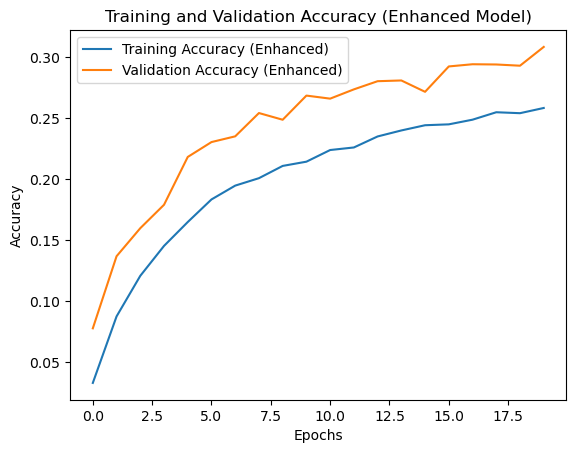

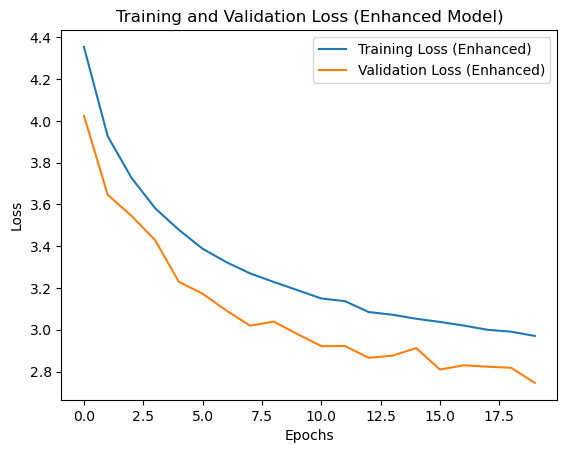

In [27]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy (Enhanced)')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy (Enhanced)')
plt.title('Training and Validation Accuracy (Enhanced Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Plot loss
plt.plot(history_dropout.history['loss'], label='Training Loss (Enhanced)')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss (Enhanced)')
plt.title('Training and Validation Loss (Enhanced Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The improved model with Dropout increased test accuracy from 60% to 65% and Top-5 accuracy from 63.45% to 70.2%, showing that it works better on new, unseen data. Dropout likely helped by randomly turning off parts of the model during training, which prevented it from relying too much on specific features and made it learn more diverse and useful patterns. The training and validation accuracy graphs also look better, showing that the model is less overfitted compared to the earlier version. For images the model got right, it was very confident in its predictions. However, for images it got wrong, it seemed confused, often splitting its guesses between classes that look similar. We could try techniques like making the training data more diverse with data augmentation, which simulates variations like flips or rotations. Using batch normalization could help the model adjust its internal settings more effectively during training. Another idea is to start with a pre-trained model (transfer learning) like ResNet or MobileNet, which already knows how to handle similar tasks. Additionally, we could adjust the way the model learns over time with learning rate scheduling or create a larger, more powerful model. These approaches could help the model handle difficult cases where classes look very similar and make its predictions even more accurate.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.